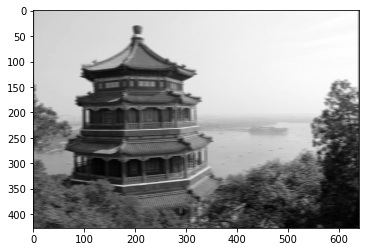

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt 

# Load sample images
# Pixel intesities vary between 0-255, scale to 0-1
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape


# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2ndfeature map
plt.show()

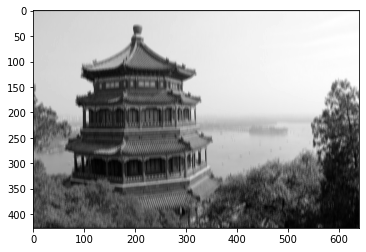

In [8]:
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.show()

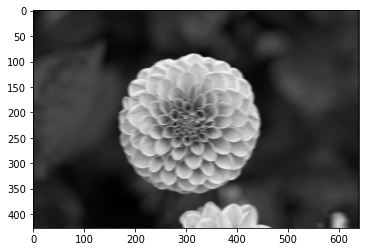

In [9]:
plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 1st image's 2ndfeature map
plt.show()

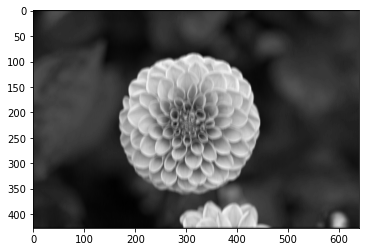

In [10]:
plt.imshow(outputs[1, :, :, 0], cmap="gray") # plot 1st image's 2ndfeature map
plt.show()

# Pooling

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

# Sample Models

In [ ]:
model = keras.models.Sequential([

# 64 7X7 filters
keras.layers.Conv2D(64, 7, activation="relu", padding="same",input_shape=[28, 28, 1]),
# max pooling layer with pool size of 2 -> divides each spatial dimension by a factor of 2
keras.layers.MaxPooling2D(2),

# Number of filter grow down the layers, low level features are few but permutation and comb to high level features infinite -> eg combining vertical and horizental lines (2 filters in lower layers) infiite in higher
    
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),

# Dense newtork
    
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])


# Resnet 34 CNN

In [ ]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
                            keras.layers.Conv2D(filters, 3, strides=strides,
                            padding="same", use_bias=False),
                            keras.layers.BatchNormalization(),
                            self.activation,
                            keras.layers.Conv2D(filters, 3, strides=1,
                            padding="same", use_bias=False),
                            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
            keras.layers.Conv2D(filters, 1, strides=strides,
            padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
        Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
        skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z)
